In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple","dark orange"]


In [3]:
df = pd.read_csv('all_data.csv')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,...,t_unique,author_count,topic_loyalty,author_loyalty,tl_log,al_log,ref_domains,top_ref,date,days_open
0,0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.600000,2018-07-13,...,3,3,1.000000,1.000,0.000000,0.000000,"['www.amazon.com', 'www.amazon.com', 'www.theg...",www.amazon.com,2015-10-15 00:00:00,1002
1,1,Maurizio Nasi,NaN,https://medium.com/@the_economist/what-if-peop...,2,"['Running'],['Maratona'],['Corsa']",monica pecchia,0,86.710000,2018-07-13,...,3,3,1.000000,1.000,0.000000,0.000000,"['www.marathoncenter.it', 'www.valenciaciudadd...",www.valenciaciudaddelrunning.com,2016-02-03 00:00:00,891
2,2,The Economist,NaN,https://medium.com/@the_economist/what-if-peop...,0,"['Artificial Intelligence'],['Data'],['Technol...",monica pecchia,1,82.830000,2018-07-13,...,3,3,1.000000,1.000,0.000000,0.000000,0,NaN,2018-07-11 00:00:00,2
3,3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,2018-07-13,...,3,8,3.666667,1.375,1.299283,0.318454,"['thehipperelement.com', 'www.coursera.org', '...",www.udemy.com,2014-11-15 00:00:00,1336
4,5,Jon Moore,NaN,https://medium.com/s/trustissues/find-out-what...,7,"['Design'],['Product Design'],['Design Thinkin...",Rishi Shah,16,111.582000,2018-07-13,...,3,8,3.666667,1.375,1.299283,0.318454,"['www.colormatters.com', 'uxtools.co', 'dribbb...",medium.com,2018-05-11 00:00:00,63


In [5]:
df.columns

Index(['Unnamed: 0', 'Author', 'Link', 'Link_a', 'Order', 'Tags', 'User',
       'comments', 'complex', 'data_parsed', 'featured', 'figures', 'link',
       'ordera', 'refs', 'sent', 'words', 'url', 'Title', 'title', 'language',
       'Claps', 'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name',
       'Data', 'first', 'first_t', 'tot_data', 'tot_topic', 'success',
       't_mode', 't_count', 't_max', 't_min', 't_unique', 'author_count',
       'topic_loyalty', 'author_loyalty', 'tl_log', 'al_log', 'ref_domains',
       'top_ref', 'date', 'days_open'],
      dtype='object')

In [7]:
df=df.drop('Unnamed: 0',axis = 1)

In [9]:
succ = df[df['success']==1]

In [10]:
succ_data = succ[succ['topic']==1]

In [12]:
succ_data.shape

(925, 46)

In [68]:
succ_data.User.nunique()

828

In [69]:
succ_data.User.value_counts().head()

Aiden Tallo           3
việt anh phan         3
Amjad Abu-Rmileh      3
surya prakash Sahu    3
Nicolas Soria         3
Name: User, dtype: int64

In [70]:
succ_data[succ_data['User']=='Aiden Tallo']

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,t_unique,author_count,topic_loyalty,author_loyalty,tl_log,al_log,ref_domains,top_ref,date,days_open
192,Medium,NaN,https://blog.goodaudience.com/the-new-data-eco...,6,"['Privacy'],['Medium']",Aiden Tallo,22,88.82,2018-07-13,0,...,3,2,4.333333,6.5,1.466337,1.871802,"['medium.com', 'www.google.com', 'www.w3.org',...",medium.com,2012-08-13 00:00:00,2160
196,Medium,https://www.medium.com/p/f03bf92035c9?source=u...,NaN,6,"['Privacy'],['Medium']",Aiden Tallo,22,88.82,2018-07-16,0,...,3,2,4.333333,6.5,1.466337,1.871802,"['medium.com', 'www.google.com', 'www.w3.org',...",medium.com,2012-08-13 00:00:00,2163
197,Medium,https://www.medium.com/p/f03bf92035c9?source=u...,NaN,6,"['Privacy'],['Medium']",Aiden Tallo,0,88.82,2018-07-16,0,...,3,2,4.333333,6.5,1.466337,1.871802,"['medium.com', 'www.google.com', 'www.w3.org',...",medium.com,2012-08-13 00:00:00,2163


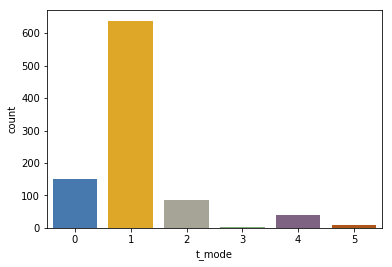

In [71]:
sb.countplot(succ_data['t_mode'],palette = sb.xkcd_palette(colors))

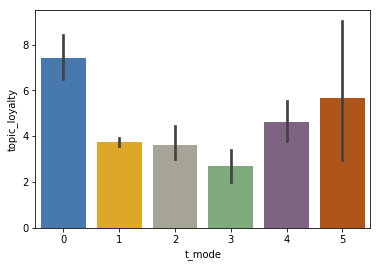

In [63]:
sb.barplot(data = succ_data,x = 't_mode',y = 'topic_loyalty',palette = sb.xkcd_palette(colors))

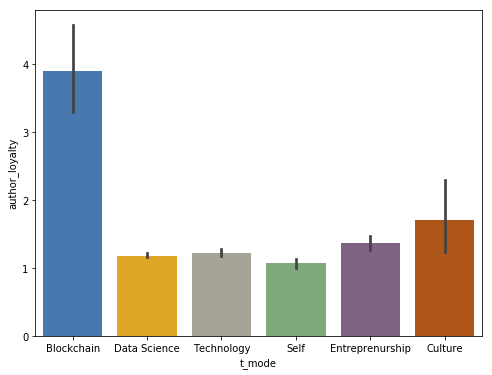

In [98]:
plt.figure(figsize = (8,6))
sb.barplot(data = succ_data,x = 't_mode',y = 'author_loyalty',palette = sb.xkcd_palette(colors))
plt.xticks(np.arange(6),('Blockchain','Data Science','Technology','Self','Entreprenurship','Culture'))
plt.show()

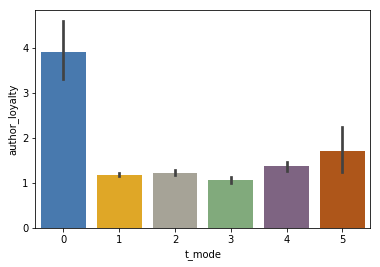

In [91]:
sb.barplot(data = succ_data,x = 't_mode',y = 'author_loyalty',palette = sb.xkcd_palette(colors))
plt.show()

In [59]:
users = df[['User','t_mode','author_loyalty','topic_loyalty']].drop_duplicates()

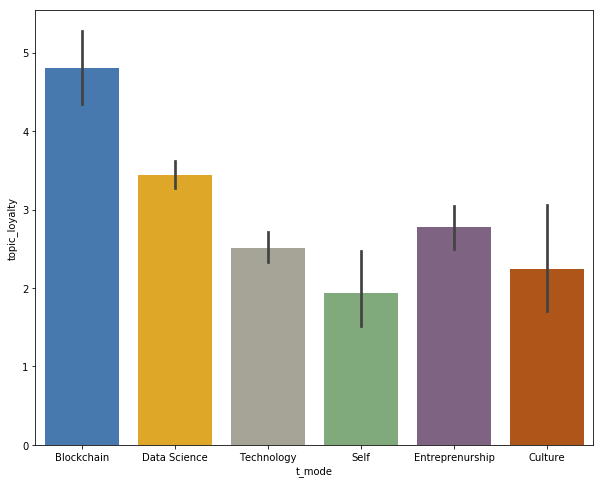

In [97]:
plt.figure(figsize = (10,8))
sb.barplot(data = users,x = 't_mode',y = 'topic_loyalty',palette = sb.xkcd_palette(colors))
plt.xticks(np.arange(6),('Blockchain','Data Science','Technology','Self','Entreprenurship','Culture'))
plt.show()

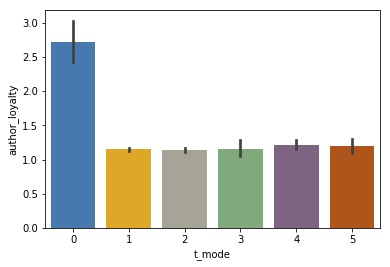

In [67]:
sb.barplot(data = users,x = 't_mode',y = 'author_loyalty',palette = sb.xkcd_palette(colors))

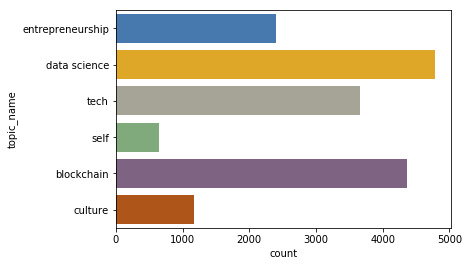

In [77]:
sb.countplot(y=df['topic_name'],palette = sb.xkcd_palette(colors))

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


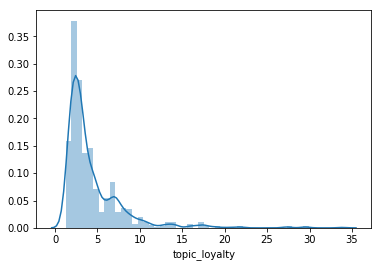

In [55]:
sb.distplot(succ_data['topic_loyalty'])

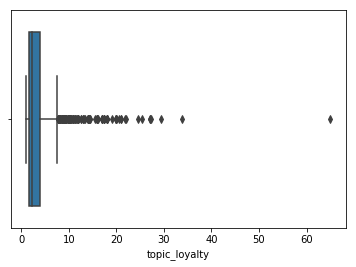

In [78]:
sb.boxplot(users['topic_loyalty'])

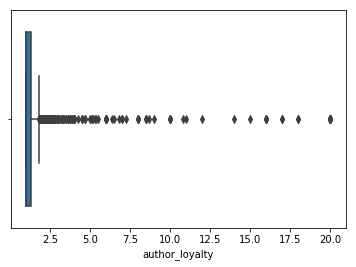

In [79]:
sb.boxplot(users['author_loyalty'])

In [40]:
succ_data[succ_data['t_mode']==1][['User','t_mode','topic_loyalty']].sort_values(by = 'topic_loyalty').head()

,User,t_mode,topic_loyalty
2189,Chap Rolls,1,1.250000
3435,Eugene Low,1,1.250000
7735,Mayank Tripathi,1,1.250000
6602,JL Diaz,1,1.333333
15177,Manuel Lopez,1,1.333333


In [41]:
df[df['User']=='Chap Rolls'][['Author','title','topic','Order','t_mode','first','first_t','success','topic_loyalty']]

,Author,title,topic,Order,t_mode,first,first_t,success,topic_loyalty
2187,Rigetti Computing,NaN,0,0,1,0,0,0,1.25
2188,Jared A. Brock,HeresHowGeorgeClooneyAccidentallyMadeBillion,4,8,1,0,8,0,1.25
2189,Nick Bourdakos,TrainYourMachineLearningModelsonGooglesGPUsfor...,1,7,1,0,7,1,1.25
2190,luna-lang,Lunathefutureofcomputing,5,6,1,6,6,0,1.25
2191,Thibault Neveu,Howtotrainaneuralnetworktocodebyitself,1,4,1,0,7,0,1.25


In [46]:
succ_data[succ_data['t_mode']!=1][['User','t_mode','topic_loyalty']].sort_values(by = 'topic_loyalty',ascending = False)

,User,t_mode,topic_loyalty
11347,Iain Houston,2,33.833333
10669,Clément Ométak,0,29.500000
10698,Clément Ométak,0,29.500000
10388,Miloš Živanović,0,27.333333
10429,Miloš Živanović,0,27.333333
1293,Ipsum Peccator,0,21.750000
1268,Ipsum Peccator,0,21.750000
587,Amir Sondrexx,0,20.500000
10546,Sherwin Techico,0,19.000000
10583,Sherwin Techico,0,19.000000


In [48]:
df[df['User']=='Miloš Živanović'][['Author','title','topic','Order','t_mode','first','first_t','success','topic_loyalty']]

,Author,title,topic,Order,t_mode,first,first_t,success,topic_loyalty
10377,Gerald Nash,LetsMaketheTiniestBlockchainBigger,0,42,0,0,42,1,27.333333
10378,Ermos Kyriakides,TheresBloodOnTheStreetsWhatNowForCryptocurrencies,0,41,0,0,42,0,27.333333
10379,Wei Chun Chew,FearnotChinaisnotbanningcryptocurrency,0,40,0,0,42,0,27.333333
10380,Bitcoin Private,CommunityUpdateSettingupourLongTermStrategy,0,39,0,0,42,0,27.333333
10381,Waltonchain_EN,WaltonchainProjectDirectorElectedtheVicePresid...,0,38,0,0,42,0,27.333333
10382,Bitcoin Private,CommunityUpdateMovingatLightningSpeedbuildingo...,0,37,0,0,42,0,27.333333
10383,Waltonchain_EN,FRECAirdropforWaltonchainSupporters,0,36,0,36,42,0,27.333333
10384,Waltonchain_EN,AnnouncementonListingofFreyrchainWaltonchainsF...,0,35,0,36,42,0,27.333333
10385,Waltonchain_EN,WaltonchainMarchAMAPart,0,34,0,0,42,0,27.333333
10386,Bitcoin Private,CommunityUpdateWalletsandMerchantPlatformPhase...,0,33,0,0,42,0,27.333333


In [57]:
succ_data.columns

Index(['Author', 'Link', 'Link_a', 'Order', 'Tags', 'User', 'comments',
       'complex', 'data_parsed', 'featured', 'figures', 'link', 'ordera',
       'refs', 'sent', 'words', 'url', 'Title', 'title', 'language', 'Claps',
       'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name', 'Data',
       'first', 'first_t', 'tot_data', 'tot_topic', 'success', 't_mode',
       't_count', 't_max', 't_min', 't_unique', 'author_count',
       'topic_loyalty', 'author_loyalty', 'tl_log', 'al_log', 'ref_domains',
       'top_ref', 'date', 'days_open'],
      dtype='object')

In [81]:
author = df.pivot_table(index = 'Author',values = 'author_loyalty',aggfunc = np.mean).sort_values(by = 'author_loyalty',ascending = False).head(10)

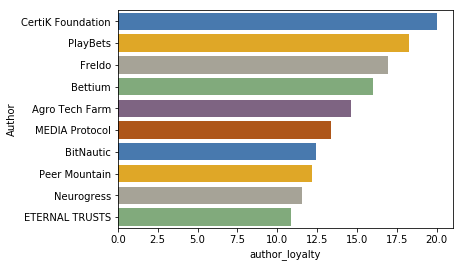

In [83]:
sb.barplot(data = author, y = author.index, x = "author_loyalty",palette = sb.xkcd_palette(colors))